# Tarea 5
---
## Matemáticas para las ciencias de la computación
---
### Problemas:
- Deep Learning for dummies:
  - Chapter 7: Introducing neuronal networks (dos ejercicios)
- Machine Learning in Action:
  - Classifying with K-nearest neineighbors (dos ejercicios)
  - Classifying with probability theory: Bayes (dos ejercicios)
  - Logistic regression (dos ejercicios)
  - Grouping unlabeled using K-mean clustering (dos ejercicios)
---
**Por:** Miguel Angel Soto Hernandez 


# Importaciones necesarias

In [1]:
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy

import numpy as np 
import pandas as pd
import operator
import math
import sys 
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Deep learning for dummies

## Chapter 7: Introducing neuronal networks

### Ejercicio 1

Una red neuronal se basa en numerosas unidades de cálculo, las neuronas, dispuestas en capas jerárquicas. Cada neurona acepta entradas de todas sus predecesoras y proporciona salidas a sus sucesoras hasta que la red neuronal en su conjunto satisface un requisito. En este punto, el procesamiento de la red termina y se recibe la salida.

Todos estos cálculos se producen de forma singular en una red neuronal. La red pasa por encima de cada uno de ellos utilizando bucles para las iteraciones del bucle. También se puede aprovechar el hecho de que la mayoría de estas operaciones son simples multiplicaciones, seguidas de sumas, y aprovechar los cálculos matriciales.

Aquí creamos una red con una capa de entrada (cuyas dimensiones están definidas por la entrada), una capa oculta con tres neuronas, y una única capa de salida que dice si la entrada es parte de una clase (básicamente una respuesta binaria 0/1). Esta arquitectura implica crear dos conjuntos de pesos representados por dos matrices (cuando realmente se utilizan matrices):
* La primera matriz utiliza un tamaño determinado por el número de entradas x 3, representa los pesos que multiplican las entradas y los suma en tres neuronas.
* La segunda matriz utiliza un tamaño de 3 x 1, reúne todas las salidas de la capa oculta, y hace que esa capa converja en la salida.

In [4]:
def init(entrada, salida):
  return np.random.randn(entrada, salida) / np.sqrt(entrada)

def crear_arquitectura(capa_entrada, primera_capa, capa_salida, semilla_random=0):
  np.random.seed(semilla_random)
  capas = X.shape[1], 3 , 1
  arquitectura = list(zip(capas[:-1], capas[1:]))
  pesos = [init(entrada, salida) for entrada, salida in arquitectura]
  return pesos

La función sigmoidea es un paso más allá de la función escalonada de Heaviside, que actúa como un interruptor que se activa en un determinado umbral. Una función escalonada de Heaviside da como resultado 1 para las entradas por encima del umbral y 0 para las entradas por debajo de él.

Las funciones sigmoideas emiten 0 o 1, respectivamente, para valores de entrada pequeños por debajo de cero o valores altos por encima de cero. Para los valores de entrada en el rango entre -5 y +5 la función da salida a valores en el rango 0-1, aumentando lentamente la salida de los valores liberados hasta alcanzar alrededor de 0,2 y luego creciendo rápidamente de forma lineal hasta alcanzar 0,8. A continuación, vuelve a disminuir a medida que la tasa de salida se acerca a 1. Este comportamiento representa una curva logística, que es útil para describir muchos fenómenos naturales, como el crecimiento de una población que empieza a crecer lentamente y luego florece y se desarrolla plenamente hasta que se ralentiza antes de alcanzar un límite de recursos (como el espacio vital disponible o la comida).

En las redes neuronales, la función sigmoidea es especialmente útil para modelar entradas que se asemejan a las probabilidades, y es diferenciable, que es un aspecto matemático que ayuda a invertir sus efectos y a elaborar la mejor fase de retropropagación.

In [5]:
def sigmoide(z):
  return 1 / (1 + np.exp(-z))

def sigmoide_prima(s):
  return s * (1 -s)

Después de tener una función de activación, se puede crear un procedimiento forward, que es una multiplicación matricial entre la entrada de cada capa y los pesos de la conexión. Después de completar la multiplicación, el código aplica la función de activación a los resultados para transformarlos de forma no lineal. El siguiente código incorpora la función sigmoide en el código feed-forward de la red. Por supuesto, puedes utilizar cualquier otra función de activación si lo deseas.

Aplicando ```alimentar()``` a la red completa, se llega finalmente a un resultado en la capa de salida. Ahora puede comparar la salida con los valores reales que desea que obtenga la red. La función de precisión determina si la red neuronal realiza bien las predicciones comparando el número de aciertos con el número total de predicciones proporcionadas.

La función ```retropropagacion()``` viene a continuación porque la red está funcionando, pero todas o algunas de las predicciones son incorrectas. La corrección de las predicciones durante el entrenamiento permite crear una red neuronal que puede tomar nuevos ejemplos y proporcionar buenas predicciones. El entrenamiento se incorpora a sus pesos de conexión como patrones presentes en los datos que pueden ayudar a predecir los resultados correctamente.

In [6]:
def alimentar(X, pesos):
  a = X.copy()
  out = list()

  for W in pesos:
      z = np.dot(a, W)
      a = sigmoide(z)
      out.append(a)

  return out
  
def presicion(etiqueta_verdadera, prediccion):
  predicciones_correctas = np.ravel(prediccion) == etiqueta_verdadera
  return np.sum(predicciones_correctas) / len(etiqueta_verdadera)

In [7]:
def retroprogapagcion(l1, l2, pesos, y):
  l2_error = y.reshape(-1, 1) - l2
  l2_delta = l2_error * sigmoide_prima(l2)
  l1_error = l2_delta.dot(pesos[1].T)
  l1_delta = l1_error * sigmoide_prima(l1)
  return l2_error, l1_delta, l2_delta

def actualizar_pesos(X, l1, l1_delta, l2_delta, pesos, alfa=1.0):
  pesos[1] = pesos[1] + (alfa * l1.T.dot(l2_delta))
  pesos[0] = pesos[0] + (alfa * X.T.dot(l1_delta))
  return pesos

La función ```predecir()``` empuja nuevos datos usando ```alimentar()```, lee la última capa de salida y transforma sus valores en predicciones del problema. Debido a que la función de activación sigmoide es tan hábil para modelar la probabilidad, el código utiliza un valor a medio camino entre 0 y 1, es decir, 0,5, como umbral para tener una salida positiva o negativa. Esta salida binaria podría ayudar a clasificar dos clases o una sola clase frente a todas las demás si un conjunto de datos tiene tres o más tipos de resultados que clasificar.

In [8]:
def predecir(X, pesos):
    _, l2 = alimentar(X, pesos)
    predicciones = np.ravel((l2 > 0.5).astype(int))
    return predicciones

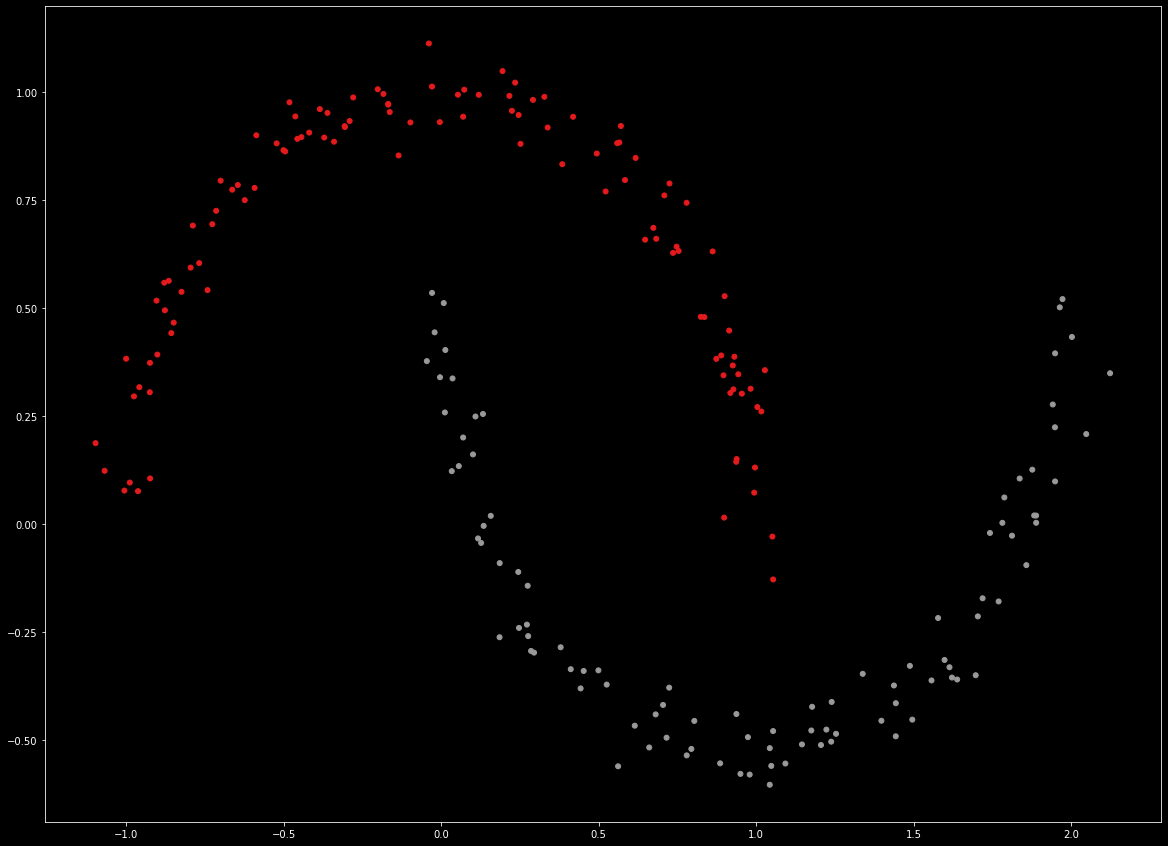

In [14]:
'''
  El código establece primero la semilla aleatoria para producir el mismo 
  resultado cada vez que se quiera ejecutar el ejemplo. El siguiente paso es 
  producir 300 ejemplos de datos y dividirlos en un conjunto de datos de 
  entrenamiento y otro de prueba. Los datos consisten en dos variables que 
  representan las coordenadas x e y de puntos en un gráfico cartesiano.
'''
np.random.seed(0)
figura = plt.figure(figsize=(20, 15))
coordenadas, cl = make_moons(300, noise=0.05)
X, Xt, y, yt = train_test_split(coordenadas, cl, test_size=0.30, random_state=0)

plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Set1)
plt.show()

Como el aprendizaje en una red neuronal se produce en iteraciones sucesivas (llamadas épocas), después de crear e inicializar los conjuntos de pesos, el código realiza un bucle de 30.000 iteraciones de los datos de las dos medias lunas (cada pasaje es una época). En cada iteración, el script llama a algunas de las funciones del núcleo de la red neuronal previamente preparadas:
* Retroalimentar los datos a través de toda la red.
* Retropropagar el error de vuelta a la red.
* Actualizar los pesos de cada capa de la red, basándose en el error retropropagado.
* Calcular los errores de entrenamiento y validación.

In [16]:
pesos = crear_arquitectura(X, 3, 1)
 
for j in range(30000 + 1):

  # Primero, alimentar hacia adelante a través de la capa oculta
  l1, l2 = alimentar(X, pesos)
    
  # Luego, retropropagación de errores desde la salida a la entrada
  l2_error, l1_delta, l2_delta = retroprogapagcion(l1, l2, pesos, y)
    
  # Finalmente, actualziar los pesos de la red
  pesos = actualizar_pesos(X, l1, l1_delta, l2_delta, pesos, alfa=0.05)
    
  # De vez en cuando, informar de los resultados
  if (j % 5000) == 0:
    error_entrenamiento = np.mean(np.abs(l2_error))
        
    print('Epoca {:5}'.format(j), end=' - ')
    print('error: {:0.4f}'.format(error_entrenamiento), end= ' - ')
        
    entrenamiento_presicion = presicion(etiqueta_verdadera=y, prediccion=(l2 > 0.5))
    prueba_predicciones = predecir(Xt, pesos)
    prueba_presicion = presicion(etiqueta_verdadera=yt, prediccion=prueba_predicciones)
        
    print('acc: train {:0.3f}'.format(entrenamiento_presicion), end= ' | ')
    print('test {:0.3f}'.format(prueba_presicion))

Epoca     0 - error: 0.5077 - acc: train 0.462 | test 0.656
Epoca  5000 - error: 0.0991 - acc: train 0.952 | test 0.944
Epoca 10000 - error: 0.0872 - acc: train 0.952 | test 0.944
Epoca 15000 - error: 0.0805 - acc: train 0.962 | test 0.944
Epoca 20000 - error: 0.0764 - acc: train 0.967 | test 0.956
Epoca 25000 - error: 0.0748 - acc: train 0.962 | test 0.967
Epoca 30000 - error: 0.0702 - acc: train 0.962 | test 0.944


**Elegir la función de activación adecuada**
* **Paso**: Una función de paso (también llamada función binaria) se basa en un umbral específico para tomar la decisión de activar o no. Utilizar una función escalonada significa que se sabe qué valor específico provocará una activación. Sin embargo, las funciones escalonadas están limitadas en el sentido de que se activan o se desactivan por completo; no existen matices de gris. Por lo tanto, cuando se intenta determinar qué clase es la más correcta basándose en una entrada dada, una función escalonada no funcionará.
* **Lineal**: Una función lineal (A = cx) proporciona una determinación de la activación en línea recta basada en la entrada. El uso de una función lineal le ayuda a determinar qué salida activar basándose en qué salida es la más correcta (expresada por la ponderación). Sin embargo, las funciones lineales sólo funcionan en una sola capa. Si se apilan varias capas de funciones lineales, la salida sería la misma que si se utilizara una sola capa, lo que anula el propósito de utilizar redes neuronales. En consecuencia, una función lineal puede aparecer como una sola capa, pero nunca como múltiples capas.
* **Sigmoide**: Una función sigmoidea (A = 1 / 1 + e-x), que produce una curva con forma de letra C o S, es no lineal. Comienza pareciéndose a la función escalonada, excepto que los valores entre dos puntos existen realmente en una curva, lo que significa que se pueden apilar funciones sigmoides para realizar una clasificación con múltiples salidas. El rango de una función sigmoide está entre 0 y 1, no entre - infinito y + infinito como en el caso de una función lineal, por lo que las activaciones están limitadas dentro de un rango específico. Sin embargo, la función sigmoide sufre un problema llamado gradiente de fuga, que significa que la función se niega a aprender después de un cierto punto porque el error propagado se reduce a cero a medida que se acerca a las capas lejanas.
* **Tanh**: Una función tanh (A = (2 / 1 + e-2x) - 1) es en realidad una función sigmoidea a escala. Tiene un rango de -1 a 1, por lo que, de nuevo, es un método preciso para activar las neuronas. La gran diferencia entre las funciones sigmoides y las funciones tanh es que el gradiente de la función tanh es más fuerte, lo que significa que la detección de pequeñas diferencias es más fácil, haciendo la clasificación más sensible. Al igual que la función sigmoide, tanh sufre problemas de gradiente de fuga.
* **ReLU**: Una función ReLU, o Unidades Lineales Rectificadas, (A(x) = max(0, x)) proporciona una salida en el rango de 0 a infinito, por lo que es similar a la función lineal excepto que también es no lineal, lo que le permite apilar funciones ReLU. Una ventaja de ReLU es que requiere menos potencia de procesamiento porque se disparan menos neuronas. La falta de actividad a medida que la neurona se acerca a la parte 0 de la línea significa que hay menos salidas potenciales que mirar. Sin embargo, esta ventaja también puede convertirse en una desventaja cuando se tiene un problema llamado ReLU moribundo. Después de un tiempo, los pesos de la red neuronal ya no proporcionan el efecto deseado (simplemente deja de aprender) y las neuronas afectadas mueren: no responden a ninguna entrada.
* **ELU (Unidad Lineal Exponencial)**: Se diferencia de la ReLU cuando las entradas son negativas. En este caso, las salidas no van a cero sino que disminuyen lentamente hasta -1 de forma exponencial.
* **PReLU (Unidad lineal paramétrica rectificada)**: Se diferencia de la ReLU cuando las entradas son negativas. En este caso, la salida es una función lineal cuyos parámetros se aprenden con la misma técnica que cualquier otro parámetro de la red.
* **LeakyReLU**: Similar a PReLU pero el parámetro de la parte lineal es fijo.

### Ejercicio 2

**Construir su propia red LeNet5**

Esta red se entrenará con una cantidad relevante de datos (el conjunto de datos de dígitos proporcionado por Keras, que consta de más de 60.000 ejemplos), por lo que podrías tener una ventaja si la ejecutas en Colab, como se explica en el capítulo 3, o en tu máquina local si tienes una GPU disponible.

In [2]:
# Guardamos la data
(X_entrenamiento, y_entrenamiento), (X_pruebas, y_pruebas) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
'''
  Los datos descargados consisten en imágenes de un solo canal de 28 x 28 
  píxeles que representan números escritos a mano del cero al nueve. Como 
  primer paso, hay que convertir la variable de respuesta (y_entrenamiento para 
  la fase de entrenamiento y y_pruebas para la prueba una vez completado el 
  modelo) en algo que la red neuronal pueda entender y trabajar
'''
numero_clases = len(np.unique(y_entrenamiento))
print(y_entrenamiento[0], end=' => ')
y_entrenamiento = keras.utils.to_categorical(y_entrenamiento, 10)
y_pruebas = keras.utils.to_categorical(y_pruebas, 10)
print(y_entrenamiento[0])

5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Obsérvese que la salida es de tipo 0 y que el 1 aparece en la posición correspondiente a a el número 5. Este ajuste es utiliza porque el neural red necesita una capa de de respuesta, que es un conjunto de neuronas (de ahí el vector vector) que debe convertirse en activado si el proporcionado respuesta es es correcta. En este caso, usted ver diez neuronas, y en el entrenamiento fase de entrenamiento, el código activa el correcta respuesta (el valor en el correcta posición es ajustar a 1) y gira el otros apagan (sus valores son 0). En el prueba fase, el neural red neural utiliza su base de datos de ejemplos para convertir el correcta neurona encendida, o en menos encender en más que el correcto que la correcta. En el siguiente código, el código código prepara los datos de entrenamiento y de prueba datos.

In [4]:
X_entrenamiento = X_entrenamiento.astype(np.float32) / 255
X_pruebas = X_pruebas.astype(np.float32) / 255
img_rows, img_cols = X_entrenamiento.shape[1:]
X_entrenamiento = X_entrenamiento.reshape(len(X_entrenamiento),
                          img_rows, img_cols, 1)
X_pruebas = X_pruebas.reshape(len(X_pruebas),
                        img_rows, img_cols, 1)
entrada_forma = (img_rows, img_cols, 1)

In [5]:
'''
  Los números de los píxeles, que van de 0 a 255, se transforman en un valor 
  decimal que va de 0 a 1. Las dos primeras líneas de código optimizan la red 
  para que funcione correctamente con números grandes que podrían causar 
  problemas. Las líneas que siguen remodelan las imágenes para que tengan 
  altura, anchura y canales. La siguiente línea de código define la arquitectura
  de LeNet5. Comienza llamando a la función secuencial que proporciona un modelo 
  vacío
'''
lenet = Sequential()

'''
  La convolución opera con un tamaño de filtro de 6 (lo que significa que creará
  seis nuevos canales hechos por convolución) y un tamaño de núcleo de 5 x 5 
  píxeles.
'''
lenet.add(Conv2D(6, kernel_size=(5, 5), activation='tanh',
    input_shape=entrada_forma, padding='same', name='C1'))

In [6]:
'''
  El ejemplo añade una capa de agrupación, denominada S2, que utiliza un núcleo 
  de 2 x 2 píxeles
'''
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

In [7]:
'''
  En este punto, el código continúa con la secuencia, siempre realizada con una 
  convolución y una capa de pooling, pero esta vez utilizando más filtros
'''
lenet.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', 
                 padding='valid'))
lenet.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

In [8]:
'''
  La LeNet5 se cierra de forma incremental mediante una convolución con 120 
  filtros. Esta convolución no tiene una capa de agrupación sino una capa de 
  aplanamiento, que proyecta las neuronas en la última capa de convolución 
  como una capa densa
'''
lenet.add(Conv2D(120, kernel_size=(5, 5), activation='tanh', name='C5'))
lenet.add(Flatten())

In [9]:
'''
  El cierre de la red es una secuencia de dos capas densas que procesan las 
  salidas de la convolución utilizando la activación tanh y softmax. Estas dos 
  capas proporcionan las capas de salida final donde las neuronas activan una 
  salida para señalar la respuesta predicha. La capa softmax es en realidad la 
  capa de salida como se especifica en name='OUTPUT'
'''
lenet.add(Dense(84, activation='tanh', name='FC6'))
lenet.add(Dense(10, activation='softmax', name='OUTPUT'))

In [10]:
'''
  Cuando el grafo esté listo, necesitas que Keras lo compile. 
  Keras lo compila basándose en el optimizador SGD
'''
lenet.compile(loss=categorical_crossentropy, optimizer='SGD', 
              metrics=['accuracy'])
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 22, 22, 16)        0         
_________________________________________________________________
C5 (Conv2D)                  (None, 18, 18, 120)       48120     
_________________________________________________________________
flatten (Flatten)            (None, 38880)             0         
_________________________________________________________________
FC6 (Dense)                  (None, 84)                3

In [11]:
# Probando el modelo
tamano_lote = 64
epocas = 50
historia = lenet.fit(X_entrenamiento, y_entrenamiento, batch_size=tamano_lote,
                      epochs=epocas, validation_data=(X_pruebas, y_pruebas))

Epoch 1/50
938/938 [==============================] - 39s 6ms/step - loss: 0.5940 - accuracy: 0.8383 - val_loss: 0.2077 - val_accuracy: 0.9407
Epoch 2/50
938/938 [==============================] - 5s 6ms/step - loss: 0.2015 - accuracy: 0.9436 - val_loss: 0.1648 - val_accuracy: 0.9531
Epoch 3/50
938/938 [==============================] - 5s 6ms/step - loss: 0.1535 - accuracy: 0.9573 - val_loss: 0.1313 - val_accuracy: 0.9643
Epoch 4/50
938/938 [==============================] - 5s 6ms/step - loss: 0.1263 - accuracy: 0.9651 - val_loss: 0.1148 - val_accuracy: 0.9680
Epoch 5/50
938/938 [==============================] - 5s 6ms/step - loss: 0.1061 - accuracy: 0.9704 - val_loss: 0.1015 - val_accuracy: 0.9711
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 0.0911 - accuracy: 0.9761 - val_loss: 0.0920 - val_accuracy: 0.9748
Epoch 7/50
938/938 [==============================] - 5s 6ms/step - loss: 0.0785 - accuracy: 0.9791 - val_loss: 0.0784 - val_accuracy: 0.9778
Epoch

# Machine Learning in Action

## Classifying with k-Nearest NeighNeighbors 
**Enfoque general de kNN**
1. Recoger: Cualquier método.
2. Preparar: Los valores numéricos son necesarios para el cálculo de la distancia. Un formato de datos estructurados es lo mejor.
3. Analizar: Cualquier método.
4. Entrenar: No se aplica al algoritmo kNN.
5. Prueba: Calcula la tasa de error.
6. Uso: Esta aplicación necesita obtener algunos datos de entrada y valores numéricos estructurados de salida. A continuación, la aplicación ejecuta el algoritmo kNN en estos datos de entrada y determina a qué clase deben pertenecer los datos deben pertenecer. La aplicación entonces realiza alguna acción sobre la clase calculada calculada.

### Ejercicio 1

En la siguiente función ```crear_dataset()``` se crea como su nombre lo indica, nuestro dataset y las etiquetas que estaremos utilizando para este problema.
  
  En las variables grupo y etiqueta que se encuentran fuera de la función estaremos guardando los valores que se crean en la función. El motivo de crear variables afuera es para mayor comodidad por si en elgún punto se desea actualizar los valores de las variables de nuestra función.


In [ ]:
def crear_dataset():
    grupo = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    etiquetas = ['A','A','B','B']
    return grupo, etiquetas

grupo, etiquetas = crear_dataset()

In [ ]:
# Verificamos nuestras variables
print(f'Grupo: \n{grupo}')
print(f'Etiquetas: {etiquetas}')

Grupo: 
[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
Etiquetas: ['A', 'A', 'B', 'B']


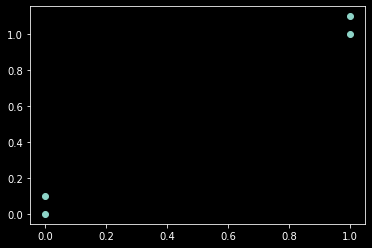

In [ ]:
# Guardamos las posiciones 0 en 'x' y las posiciones 1 en 'y'
x = [x[0] for x in grupo]
y = [y[1] for y in grupo]

# Graficando
plt.style.use('dark_background')
plt.plot(x, y, 'o')

La función ```casificador()``` toma cuatro entradas: el vector de entrada a clasificar llamado ```datos_sin_entrenar```, nuestra matriz completa de ejemplos de entrenamiento llamada ```dataset```, un vector de etiquetas llamado ```etiquetas```, y, finalmente, ```k```, el número de vecinos más cercanos a utilizar en la votación. El vector de etiquetas debe tener tantos elementos como filas tenga la matriz ```dataset```. Las distancias B se calculan utilizando la distancia euclidiana, donde la distancia entre dos vectores, xA y xB, con dos elementos, viene dada
por:

$$d=\sqrt{(xA_0 - xB_0)^2 + (xA_1 - xB_1)^2}$$

A continuación, las primeras ```k``` distancias o las ```k``` más bajas se utilizan para votar la clase de ```datos_sin_entrenar```. La entrada ```k``` debe ser siempre un número entero positivo. Por último, se toma el diccionario ```conteo_de_clase``` y se descompone en una lista de tuplas y luego se ordenan las tuplas por el segundo elemento de la tupla utilizando el método ```itemgetter()``` del módulo operator importado en la segunda línea del programa. Esta ordenación se hace en sentido inverso, de modo que se tiene de mayor a menor. Por último, puede devolver la etiqueta del elemento que aparece con más frecuencia.



In [ ]:
def clasificador(datos_sin_entrenar, dataset, etiquetas, k):
    tamano_dataset = dataset.shape[0]
    diferenciacion_matricial = np.tile(datos_sin_entrenar, (tamano_dataset, 1)) - dataset
    diferenciacion_matricial_cuadrada = diferenciacion_matricial ** 2                           
    distancias_cuadradas = diferenciacion_matricial_cuadrada.sum(axis = 1)          
    distancias = distancias_cuadradas ** 0.5                 
    lista_ordenada_por_incidencias = distancias.argsort()
    conteo_de_clase = {}

    for i in range(k):
        voto_de_etiqueta = etiquetas[lista_ordenada_por_incidencias[i]]                 
        conteo_de_clase[voto_de_etiqueta] = conteo_de_clase.get(voto_de_etiqueta, 0) + 1  

    clase_de_conteo_ordenada = sorted(conteo_de_clase.items(),
        key=operator.itemgetter(1), reverse=True) 
          
    return clase_de_conteo_ordenada[0][0]

In [ ]:
# Predecimos la clase
clasificador([1, 0.5], grupo, etiquetas, 3)

'A'

### Ejercicio 2

La función ```archivo_a_matriz``` lee el archivo y cuenta el número de líneas. A continuación, crea una matriz NumPy para rellenar y devolver. En este ejemplo el tamaño será de ```numero_de_lineas``` x 3, pero se podría modificar para hacer esto adaptable a las diversas entradas. Finalmente, se hace un bucle sobre todas las líneas del archivo y se quita el carácter de la línea de retorno con ```line.strip()```. A continuación, se divide la línea en una lista de elementos elementos delimitados por el carácter de tabulación: ```'\t'```. Se toman los tres primeros elementos y se metes en una fila de tu matriz, y se utiliza la característica de Python de indexación negativa para obtener el último elemento de la lista para ponerlo en ```etiquetas_de_vector```. Aquí se tiene que decirle explícitamente al intérprete que quieres la versión entera del último elemento de la lista, o te dará la versión de cadena. Normalmente, tendrías que hacer esto, pero NumPy se encarga de esos detalles por ti.

In [ ]:
def archivo_a_matriz(nombre_archivo):
  archivo = open(nombre_archivo)
  numero_de_lineas = len(archivo.readlines())     
  matriz = np.zeros((numero_de_lineas, 3))
  etiquetas_de_vector = []
  archivo = open(nombre_archivo)
  index = 0

  for line in archivo.readlines():               
      line = line.strip()                            
      lista_desde_linea = line.split('\t')       
      matriz[index,:] = lista_desde_linea[0:3]
      etiquetas = {'didntLike': 1,
                   'smallDoses': 2,
                   'largeDoses': 3}
      etiquetas_de_vector.append(etiquetas[lista_desde_linea[-1]])
      index += 1

  return matriz, etiquetas_de_vector

In [ ]:
# Mandamos llamar la función
matriz_dating, etiquetas_dating = archivo_a_matriz('dating_set.txt')

# Imprimimos los valores obtenidos por la función
print(f'Matriz dating: \n{matriz_dating}')
print(f'Etiquetas dating: \n{etiquetas_dating}')

Matriz dating: 
[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
Etiquetas dating: 
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2

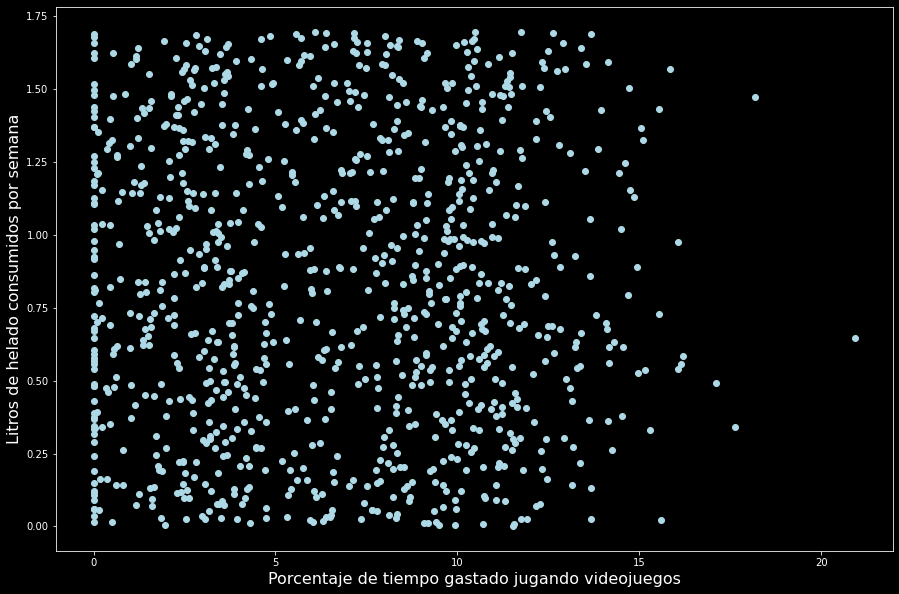

In [ ]:
'''
  Veamos los datos con más detalle haciendo algunos gráficos de dispersión de 
  los datos desde Matplotlib.
'''
figura = plt.figure(figsize=(15, 10))
ax = figura.add_subplot(111)
ax.scatter(matriz_dating[:, 1], matriz_dating[:, 2], color='lightblue')
ax.set_xlabel('Porcentaje de tiempo gastado jugando videojuegos', fontsize=16.0)
ax.set_ylabel('Litros de helado consumidos por semana', fontsize=16.0)
plt.show()

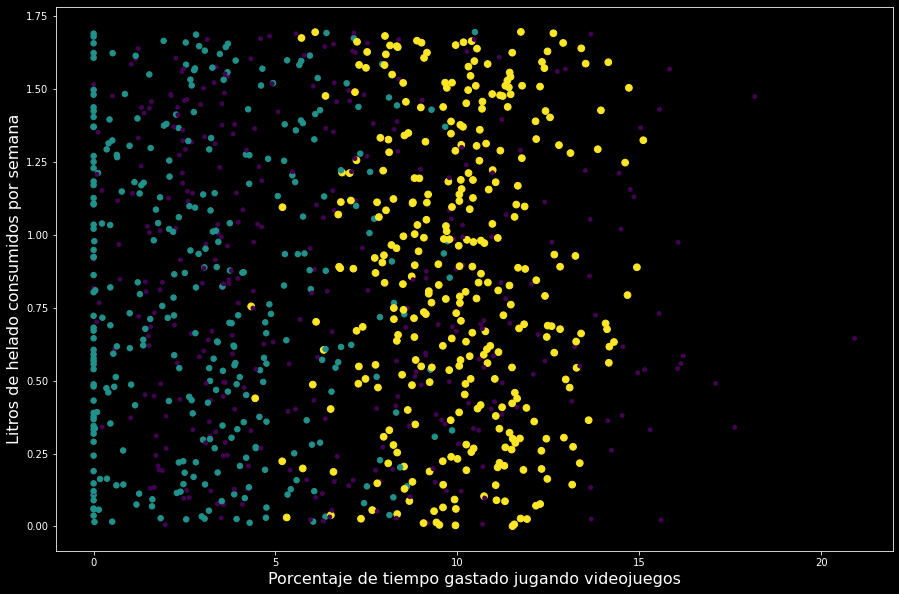

In [ ]:
'''
  Ahora, mostramos los datos separados por las etiquetas y por colores para
  su mayor distinción.
'''
figura = plt.figure(figsize=(15, 10))
ax = figura.add_subplot(111)
ax.scatter(matriz_dating[:, 1], matriz_dating[:, 2], 
          15.0 * np.array(etiquetas_dating), 15.0 * np.array(etiquetas_dating))
ax.set_xlabel('Porcentaje de tiempo gastado jugando videojuegos', fontsize=16.0)
ax.set_ylabel('Litros de helado consumidos por semana', fontsize=16.0)
plt.show()

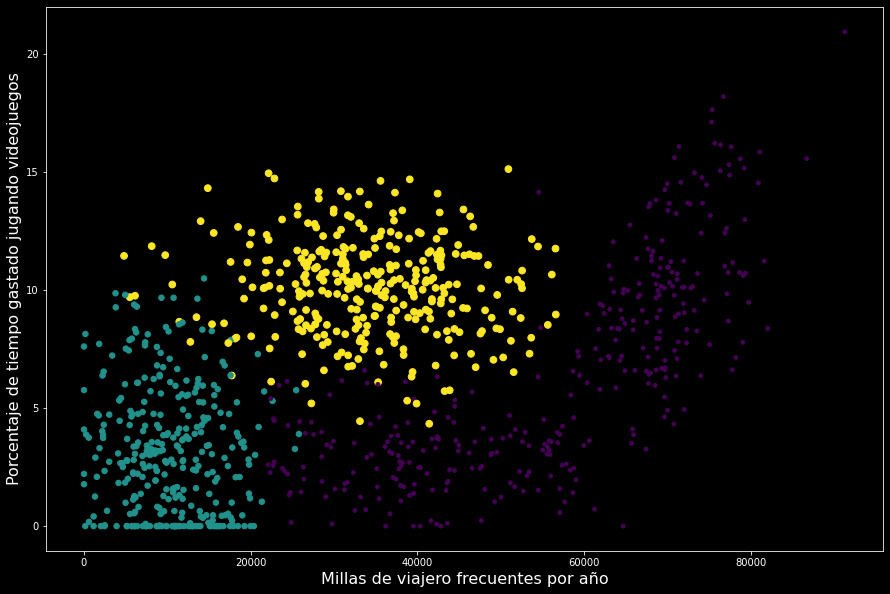

In [ ]:
'''
  Ahora, datos de citas con millas de viajero frecuente frente al porcentaje de 
  tiempo dedicado a los videojuegos. Los datos de las citas tienen tres 
  características, y estas dos características muestran las áreas donde se 
  encuentran las tres clases diferentes.
'''
figura = plt.figure(figsize=(15, 10))
ax = figura.add_subplot(111)
ax.scatter(matriz_dating[:, 0], matriz_dating[:, 1], 
          15.0 * np.array(etiquetas_dating), 15.0 * np.array(etiquetas_dating))
ax.set_xlabel('Millas de viajero frecuentes por año', fontsize=16.0)
ax.set_ylabel('Porcentaje de tiempo gastado jugando videojuegos', fontsize=16.0)
plt.show()

La función ```auto_normalizacion()``` que se define a continuación, se obtienen los valores mínimos de cada columna y se colocan esto en ```valores_minimos```; de manera similar, se obtienen los valores máximos. El 0 en ```dataSet.min(0)``` le permite tomar los mínimos de las columnas, no de las filas. A continuación, se calcula el rango de valores posibles que se ven en nuestros datos y luego se crea una nueva matriz para devolver.

Para obtener los valores normalizados, se restan los valores mínimos y luego se dividen por el rango. El problema con esto es que nuestra matriz es 1000x3, mientras que los valores mínimos y los rangos son de 1x3. Para superar esto, se utiliza la función NumPy ```tile()``` para crear una matriz del mismo tamaño que nuestra matriz de entrada y luego llenarla con muchas copias o mosaicos. Tenga en cuenta que la función B es una división por elementos. En otros paquetes de software numérico se puede utilizar el operador / para la división de matrices, pero en NumPy hay que utilizar ```linalg.solve(matA, matB)``` para la división de matrices

In [ ]:
def auto_noramalizacion(dataset):
  valores_minimos = dataset.min(0)
  valores_maximos = dataset.max(0)
  rangos = valores_maximos - valores_minimos
  dataset_normalizado = np.zeros(np.shape(dataset))
  m = dataset.shape[0]
  dataset_normalizado = dataset - np.tile(valores_minimos, (m, 1))
  dataset_normalizado = dataset_normalizado / np.tile(rangos, (m, 1))   
  return dataset_normalizado, rangos, valores_minimos

In [ ]:
# mandamos llamar la función
dataset_normalizado, rangos, valores_minimos = \
            auto_noramalizacion(matriz_dating)

# imprimimos los valores obtenidos
print(f'Dataset normalizado: \n{dataset_normalizado}')
print(f'Rangos: \n{rangos}')
print(f'Valores minimos: \n{valores_minimos}')

Dataset normalizado: 
[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
Rangos: 
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
Valores minimos: 
[0.       0.       0.001156]


A continuación, ```clasificar_datos_test()``` calcula el número de vectores de prueba, y esto se utiliza para decidir qué vectores de ```normMat``` se utilizarán para la prueba y cuáles para el entrenamiento. Las dos partes se introducen en nuestro clasificador kNN original, ```clasificador()```. Finalmente, se calcula y se muestra la tasa de error. Tenga en cuenta que está utilizando el clasificador original; pasó la mayor parte de esta sección manipulando los datos para poder aplicarlos a un clasificador simple.

In [ ]:
def clasificar_datos_test():
  ratio = 0.10     
  matriz_dating, etiquetas_dating = archivo_a_matriz('dating_set.txt')
  dataset_normalizado, rangos, valores_minimos = \
          auto_noramalizacion(matriz_dating)
  m = dataset_normalizado.shape[0]
  num_vectores_prueba = int(m * ratio)
  conteo_error = 0.0

  for i in range(num_vectores_prueba):
      resultado_clasificador = clasificador(dataset_normalizado[i, :],\
                    dataset_normalizado[num_vectores_prueba:m, :],\
                    etiquetas_dating[num_vectores_prueba:m], 3)
      print(f'Clasificador: {resultado_clasificador}; Real: {etiquetas_dating[i]}')
      if (resultado_clasificador != etiquetas_dating[i]): conteo_error += 1.0

  print(f'El ratio total de error es: {conteo_error/float(num_vectores_prueba)}')

In [ ]:
clasificar_datos_test()

Clasificador: 3; Real: 3
Clasificador: 2; Real: 2
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 3; Real: 3
Clasificador: 3; Real: 3
Clasificador: 1; Real: 1
Clasificador: 3; Real: 3
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 2; Real: 2
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 2; Real: 2
Clasificador: 3; Real: 3
Clasificador: 2; Real: 2
Clasificador: 1; Real: 1
Clasificador: 3; Real: 2
Clasificador: 3; Real: 3
Clasificador: 2; Real: 2
Clasificador: 3; Real: 3
Clasificador: 2; Real: 2
Clasificador: 3; Real: 3
Clasificador: 2; Real: 2
Clasificador: 1; Real: 1
Clasificador: 3; Real: 3
Clasificador: 1; Real: 1
Clasificador: 3; Real: 3
Clasificador: 1; Real: 1
Clasificador: 2; Real: 2
Clasificador: 1; Real: 1
Clasificador: 1; Real: 1
Clasificador: 2; Real: 2
Clasificador: 3; Real: 3
Clasificador: 3; Real: 3


**Problema:** Hellen quiere encontrar a alguien en el sitio de citas e introducirá su información. El programa tiene que predecir cuánto le gustará esta persona.

In [ ]:
def clasificar_persona():
  resultados = ['no del todo','en dosis pequeñas', 'en dosis grandes']
  porcentaje_videojuegos = float(input(\
               "Porcentaje de tiempo jugando videojuegos: "))
  millas = float(input("Millas ganadas por viajero frecuente: "))
  helado = float(input("Litros de helado consumidos por año: "))
  matriz_dating, etiquetas_dating = archivo_a_matriz('dating_set.txt')

  dataset_normalizado, rangos, valores_minimos = \
          auto_noramalizacion(matriz_dating)

  arreglo = np.array([millas, porcentaje_videojuegos, helado])

  resultados_clasificador = clasificador(
                    (arreglo - valores_minimos) / rangos,
                     dataset_normalizado, etiquetas_dating, 3)
        
  print(f'Esta persona probablemente te gustara {resultados[resultados_clasificador - 1]}')               

In [ ]:
clasificar_persona()

Porcentaje de tiempo jugando videojuegos: 10
Millas ganadas por viajero frecuente: 10000
Litros de helado consumidos por año: 0.5
Esta persona probablemente te gustara en dosis pequeñas


## Classifying with probability theory: Bayes
**Enfoque general de Bayes**
1. Recoger: Cualquier método. En este capítulo utilizaremos los canales RSS.
2. Preparar: Se necesitan valores numéricos o booleanos.
3. Analizar: Con muchas características, trazar características no es útil. Mirar los histogramas es una mejor idea.
4. Entrenar: Calcule las probabilidades condicionales de las características independientes.
5. Prueba: Calcular la tasa de error.
6. Utilización: Una aplicación común de Bayes es la clasificación de documentos. Se puede utilizar Bayes en cualquier escenario de clasificación. No tiene por qué ser un texto

Definiendo las siguientes funciones:

* ```cargar_dataset()```: es un conjunto tokenizado de documentos de un tablón de mensajes de amantes de los dálmatas.
* ```crear_vocabulario()```: creará una lista de todas las palabras únicas en todos nuestros documentos.
* ```set_palabras_a_vector()```: toma la lista de vocabulario y un documento, y produce un vector de 1s y 0s para representar si una palabra de nuestro vocabulario está presente o no en el documento dado.



### Ejercicio 1

In [ ]:
def cargar_dataset():
  lista_posteo = [['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
  clase_vector = [0, 1, 0, 1, 0, 1] # 1 abusivo, 0 no abusivo
  return lista_posteo, clase_vector


def crear_vocabulario(dataset):
  set_vocabulario = set([])

  for documento in dataset:
    set_vocabulario = set_vocabulario | set(documento)

  return list(set_vocabulario)


def set_palabras_a_vector(lista_vocabulario, set_inicial):
  vector_retorno = [0] * len(lista_vocabulario)            
  
  for palabra in set_inicial:
    if palabra in lista_vocabulario:
        vector_retorno[lista_vocabulario.index(palabra)] = 1
    else: 
      print(f'La palabra {palabra} no esta en el vocabulario')
  
  return vector_retorno

In [ ]:
# Probamos las funciones y vemos los datos que regresan
lista_posteo, clase_vector = cargar_dataset()
lista_vocabulario = crear_vocabulario(lista_posteo)

print(f'Vocabulario: {lista_vocabulario}')
print(f'Vocabulario a vector: {set_palabras_a_vector(lista_vocabulario, lista_posteo[0])}')

Vocabulario: ['please', 'food', 'garbage', 'buying', 'not', 'problems', 'is', 'mr', 'steak', 'dog', 'him', 'licks', 'stupid', 'has', 'my', 'worthless', 'to', 'park', 'posting', 'stop', 'quit', 'maybe', 'how', 'take', 'ate', 'help', 'love', 'dalmation', 'so', 'I', 'flea', 'cute']
Vocabulario a vector: [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


La función ```entrenamiento_bayes()``` toma una matriz de documentos, trainMatrix, y un vector con las etiquetas de clase de cada uno de los documentos, trainCategory. Lo primero que hace es calcular la probabilidad de que el documento sea un documento abusivo (clase=1). Esta es la P(1) de arriba; como este es un problema de dos clases, puede obtener P(0) por 1-P(1).

In [ ]:
def entrenamiento_bayes(matriz_entrenamiento, categoria_entrenamiento):
  num_doc_entrenamiento = len(matriz_entrenamiento)
  num_palabras = len(matriz_entrenamiento[0])
  palabras_abusivas = sum(categoria_entrenamiento) / float(num_doc_entrenamiento)
  prob_numerador_0 = np.zeros(num_palabras)
  prob_numerador_1 = np.zeros(num_palabras)
  prob_denominador_0 = 0.0
  prob_denominador_1 = 0.0 

  for i in range(num_doc_entrenamiento):
    if categoria_entrenamiento[i] == 1:
      prob_numerador_1 += matriz_entrenamiento[i]           
      prob_denominador_1 += sum(matriz_entrenamiento[i])           
    else:
      prob_numerador_0 += matriz_entrenamiento[i]
      prob_denominador_0 += sum(matriz_entrenamiento[i])

  prob_vectorizado_1 = prob_numerador_1 / prob_denominador_1 #change to log()     
  prob_vectorizado_0 = prob_numerador_0 / prob_denominador_0 #change to log()
  return prob_vectorizado_0, prob_vectorizado_1, palabras_abusivas

In [ ]:
# Creamos nuestra matriz de entrenamiento
matriz_entrenamiento = []

for post in lista_posteo:
  matriz_entrenamiento.append(set_palabras_a_vector(lista_vocabulario, post))

print(f'Matriz de entrenamiento: {matriz_entrenamiento}')  

Matriz de entrenamiento: [[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
# Ejecutamos la función entrenamiento_bayes()
prob_vectorizado_0, prob_vectorizado_1, palabras_abusivas = \
      entrenamiento_bayes(matriz_entrenamiento, clase_vector)

print(f'Palabras abusivas: \n{palabras_abusivas}')
print(f'\nVector de probabilidad de 0: \n{prob_vectorizado_0}')
print(f'\nVector de probabilidad de 1: \n{prob_vectorizado_1}')

Palabras abusivas: 
0.5

Vector de probabilidad de 0: 
[0.04166667 0.         0.         0.         0.         0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.08333333 0.04166667
 0.         0.04166667 0.125      0.         0.04166667 0.
 0.         0.04166667 0.         0.         0.04166667 0.
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667]

Vector de probabilidad de 1: 
[0.         0.05263158 0.05263158 0.05263158 0.05263158 0.
 0.         0.         0.         0.10526316 0.05263158 0.
 0.15789474 0.         0.         0.10526316 0.05263158 0.05263158
 0.05263158 0.05263158 0.05263158 0.05263158 0.         0.05263158
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


La función ```clasificadorNB()``` toma cuatro entradas: un vector para clasificar llamado ```vector_a_clasificar``` y tres probabilidades calculadas en la función ```entrenamiento_bayes()```. Se utilizan matrices NumPy para multiplicar dos vectores. La multiplicación es por elementos; es decir, se multiplican los primeros elementos de ambos vectores, luego los segundos elementos, y así sucesivamente. A continuación se suman los valores de todas de las palabras de nuestro vocabulario y lo sumas a la probabilidad logarítmica de la clase. Por último, vemos qué probabilidad es mayor y devolvemos la etiqueta de la clase.

La segunda función ```pruebasNB()``` es una función de conveniencia para envolver todo
adecuadamente.

In [ ]:
def clasificadorNB(vector_a_clasificar, prob_vectorizado_0, prob_vectorizado_1, palabras):
  probabilidad_1 = sum(vector_a_clasificar * prob_vectorizado_1) + np.log(palabras)        
  probabilidad_0 = sum(vector_a_clasificar * prob_vectorizado_0) + np.log(1.0 - palabras)

  if probabilidad_1 > probabilidad_0:
    return 1
  else:
    return 0


def pruebasNB():
  lista_posteo, clase_vector = cargar_dataset()
  lista_vocabulario = crear_vocabulario(lista_posteo)
  matriz_entrenamiento = []

  for post in lista_posteo:
    matriz_entrenamiento.append(set_palabras_a_vector(lista_vocabulario, post))
    prob_vectorizado_0, prob_vectorizado_1, palabras_abusivas = \
          entrenamiento_bayes(np.array(matriz_entrenamiento), np.array(clase_vector))

  # Prueba 1
  entrada_prueba = ['love', 'my', 'dalmation']
  este_documento = np.array(set_palabras_a_vector(lista_vocabulario, entrada_prueba))
  print(f'{entrada_prueba} clasificado como: \
    {clasificadorNB(este_documento, prob_vectorizado_0,prob_vectorizado_1, palabras_abusivas)}')

  # Prueba 2
  entrada_prueba = ['stupid', 'garbage']
  este_documento = np.array(set_palabras_a_vector(lista_vocabulario, entrada_prueba))
  print(f'{entrada_prueba} clasificado como: \
    {clasificadorNB(este_documento, prob_vectorizado_0, prob_vectorizado_1, palabras_abusivas)}')

In [ ]:
# Probando la funcion pruebasNB()
pruebasNB()

['love', 'my', 'dalmation'] clasificado como:     0
['stupid', 'garbage'] clasificado como:     1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


### Ejercicio 2

La función ```prueba_spam()``` muestra la tasa de error de 10 correos electrónicos seleccionados al azar. Como se seleccionan al azar, los resultados pueden ser diferentes cada vez. Si hay un error, mostrará la lista de palabras de ese documento para darle una idea de lo que se clasificó mal. Para obtener una buena estimación de la tasa de error, debes repetir este procedimiento varias veces, digamos 10, y promediar los resultados. Yo lo hice y obtuve una tasa de error media del 6%.

In [ ]:
def tokenizador(cadena_larga):   
  import re
  lista_tokens = re.split('\W+', cadena_larga)
  return [token.lower() for token in lista_tokens if len(token) > 2]


def prueba_spam():
  lista_documento = [] 
  lista_clase = [] 
  texto_completo = []

  for i in range(1,26):
    lista_palabras = tokenizador(open('/content/drive/MyDrive/Colab Notebooks/CIC/1 semestre/Matemáticas para las ciencias de la computación/email/spam/%d.txt' % i).read()) 
    lista_documento.append(lista_palabras)                                   
    texto_completo.extend(lista_palabras)                                  
    lista_clase.append(1)                                        
    lista_palabras = tokenizador(open('/content/drive/MyDrive/Colab Notebooks/CIC/1 semestre/Matemáticas para las ciencias de la computación/email/ham/%d.txt' % i).read())  
    lista_documento.append(lista_palabras)                                   
    texto_completo.extend(lista_palabras)                                  
    lista_clase.append(0)

  lista_vocabulario = crear_vocabulario(lista_documento)
  set_entrenamiento = list(range(50))
  set_prueba = []

  for i in range(10):                                   
    index_random = int(np.random.uniform(0, len(set_entrenamiento)))  
    set_prueba.append(set_entrenamiento[index_random])            
    del(set_entrenamiento[index_random])

  matriz_entrenamiento = []
  clases_entrenamiento = []

  for documento in set_entrenamiento:
    matriz_entrenamiento.append(set_palabras_a_vector(lista_vocabulario, lista_documento[documento]))
    clases_entrenamiento.append(lista_clase[documento])

  prob_vec_0, prob_vec_1, prob_spam = \
    entrenamiento_bayes(np.array(matriz_entrenamiento), np.array(clases_entrenamiento))
  conteo_errores = 0

  for documento in set_prueba:                                          
    vector_palabra = set_palabras_a_vector(lista_vocabulario, lista_documento[documento])     
    if clasificadorNB(np.array(vector_palabra), prob_vec_0, prob_vec_1, prob_spam) != lista_clase[documento]:                                             
      conteo_errores += 1
  print(f'El ratio de error es de: {float(conteo_errores) / len(set_prueba)}')

In [ ]:
prueba_spam()

El ratio de error es de: 0.6


## Logistic regression

**Enfoque general de la regresión logística**
1. Recoger: Cualquier método.
2. Preparar: Los valores numéricos son necesarios para el cálculo de la distancia. Un formato de datos estructurados es lo mejor.
3. Analizar: Cualquier método.
4. Entrenar: Pasaremos la mayor parte del tiempo entrenando, donde tratamos de encontrar los coeficientes óptimos para clasificar nuestros datos.
5. Prueba: La clasificación es rápida y sencilla una vez realizado el paso de entrenamiento.
6. Uso: Esta aplicación necesita obtener algunos datos de entrada y valores numéricos estructurados de salida. A continuación, la aplicación aplica el cálculo de regresión simple en datos de entrada y determina a qué clase clase deben pertenecer los datos de entrada a la que deben pertenecer los datos de entrada.
A continuación, la aplicación realiza alguna acción sobre la clase calculada
calculada.

### Ejercicio 1

La función ```cargar_dataset()``` abre el archivo de texto testSet.txt y lee cada línea. Los dos primeros valores de la línea son X1 y X2, y el tercer valor es la etiqueta de clase para nuestro conjunto de datos. Además, esto establece el valor de X0 a 1,0, que es una convención que utilizamos

La función ```gradiente_ascendente()```, toma dos entradas. La primera entrada, dataMatIn, es una matriz 2D NumPy, donde las columnas son las diferentes características y las filas son los diferentes ejemplos de entrenamiento. Nuestros datos de ejemplo tienen dos características más la característica 0 y 100 ejemplos, por lo que será una matriz de 100x3. 

Se toman las matrices de entrada y se convierten en matrices NumPy. La entrada ```clases_etiquetas``` es un vector de 1x100 filas, y para que las matemáticas de la matriz funcionen, necesitas que sea un vector de columnas, así que tomas la transposición de la misma y la asignas a la variable ```matriz_datos```. A continuación, se obtiene el tamaño de la matriz y se establecen algunos parámetros para nuestro algoritmo de ascenso por gradiente. 

La variable alpha es el tamaño del paso que tomarás hacia el objetivo, y ```ciclos_maximos``` es el número de veces que vas a repetir el cálculo antes de parar. El bucle for itera sobre el conjunto de datos, y finalmente devuelve los pesos. La variable ```h``` no es un número sino un vector de columnas con tantos elementos como puntos de datos tengas, 100 en este ejemplo. La multiplicación ```matriz_datos``` * ```pesos``` no es una multiplicación sino en realidad 300.

In [ ]:
def cargar_dataset():
  matriz_datos = []
  matriz_etiquetas = []
  dataset = open('/content/drive/MyDrive/Colab Notebooks/CIC/1 semestre/Matemáticas para las ciencias de la computación/test_set.txt')

  for line in dataset.readlines():
    arreglo_lineal = line.strip().split()
    matriz_datos.append([1.0, float(arreglo_lineal[0]), float(arreglo_lineal[1])])
    matriz_etiquetas.append(int(float(arreglo_lineal[2])))

  return matriz_datos, matriz_etiquetas


def sigmoide(vector_entrada):
  return 1.0 / (1 + np.exp(-vector_entrada))


def gradiente_ascendente(matriz_entrada, etiquetas_clases):
  matriz_datos = np.mat(matriz_entrada)             
  matriz_etiquetas = np.mat(etiquetas_clases).transpose()          
  mat_datos_forma, mat_etiquetas_forma = np.shape(matriz_datos)
  alfa = 0.001
  ciclos_maximos = 500
  pesos = np.ones((mat_etiquetas_forma, 1))

  for k in range(ciclos_maximos):             
    h = sigmoide(matriz_datos * pesos)                             
    error = (matriz_etiquetas - h)                                      
    pesos = pesos + alfa * matriz_datos.transpose() * error   

  return pesos

In [ ]:
matriz_datos, matriz_etiquetas = cargar_dataset()
print(f'Matriz datos: \n{matriz_datos}')
print(f'\nMatriz etiquetas: \n{matriz_etiquetas}')
print(f'\nGradiente ascendente: \n{gradiente_ascendente(matriz_datos, matriz_etiquetas)}')

Matriz datos: 
[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9

In [ ]:
def graficar_mejor_aproximacion(pesos_entrada, titulo):
  pesos = pesos_entrada.getA()
  matriz_datos, matriz_etiquetas = cargar_dataset()
  arreglo_datos = np.array(matriz_datos)
  n = np.shape(arreglo_datos)[0] 
  coord_x1 = []
  coord_y1 = []
  coord_x2 = []
  coord_y2 = []

  for i in range(n):
    if int(matriz_etiquetas[i]) == 1:
      coord_x1.append(arreglo_datos[i, 1])
      coord_y1.append(arreglo_datos[i, 2])
    else:
      coord_x2.append(arreglo_datos[i, 1])
      coord_y2.append(arreglo_datos[i, 2])
  
  figura = plt.figure(figsize=(20, 15))
  ax = figura.add_subplot(111)
  ax.scatter(coord_x1, coord_y1, s=80, c='lightblue', marker='^')
  ax.scatter(coord_x2, coord_y2, s=80, c='blue', marker='s')
  x = np.arange(-3.0, 3.0, 0.1)
  y = (-pesos[0] -pesos[1] * x) / pesos[2]
  ax.plot(x, y, color='red')
  plt.title(titulo, fontsize=30)
  plt.xlabel('X1', fontsize=23) 
  plt.ylabel('X2', fontsize=23)
  plt.show() 

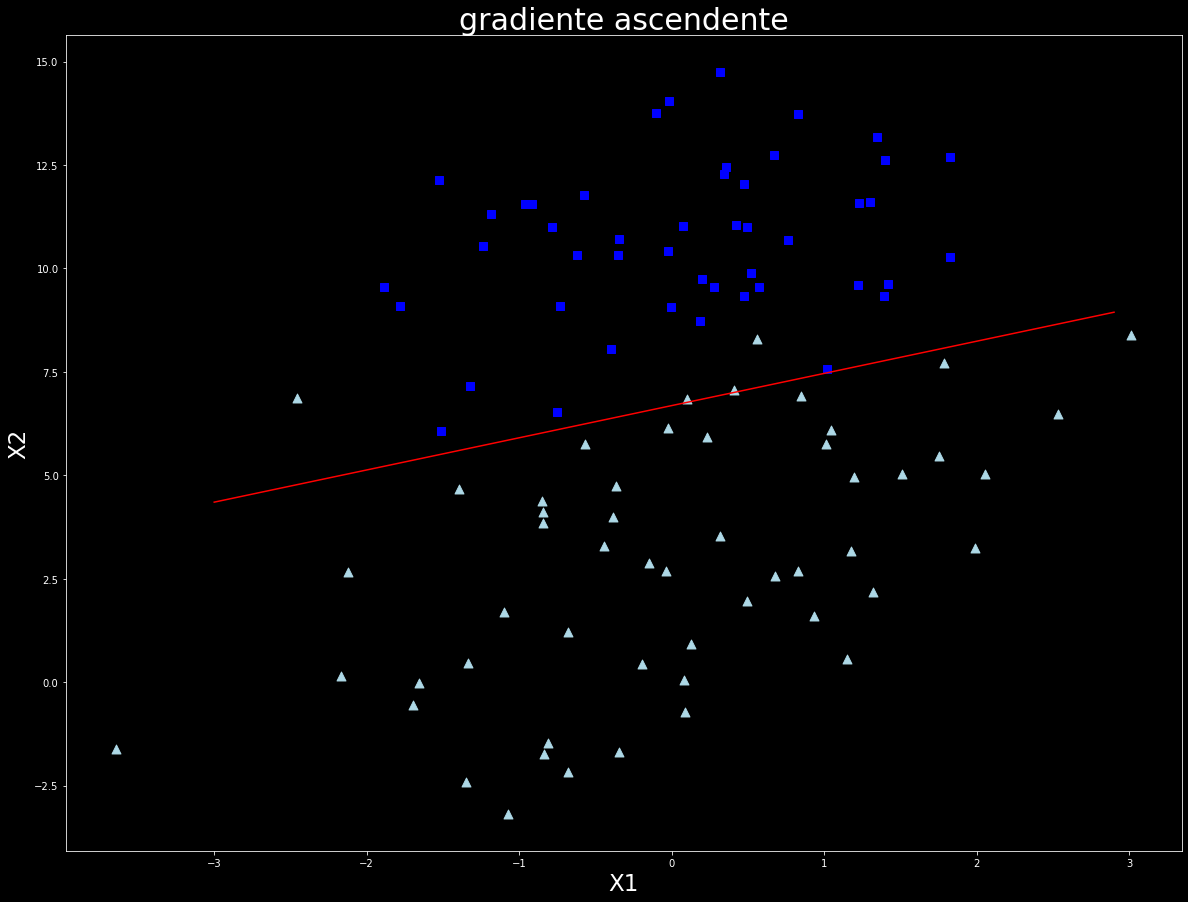

In [ ]:
graficar_mejor_aproximacion(gradiente_ascendente(matriz_datos, matriz_etiquetas),\
                            'gradiente ascendente')

### Ejercicio 2

Una alternativa a este método es actualizar los pesos utilizando sólo una instancia a la vez. Esto se conoce como **ascenso de gradiente estocástico**. El ascenso de gradiente estocástico es un ejemplo de algoritmo de aprendizaje en línea. Se conoce como online porque podemos actualizar el clasificador de forma incremental a medida que llegan nuevos datos, en lugar de hacerlo todo a la vez. El método de todo a la vez se conoce como procesamiento por lotes.

In [ ]:
def gradiente_ascendente_estocastico(matriz_datos, etiquetas_clases):
  m, n = np.shape(matriz_datos)
  alfa = 0.01
  pesos = np.ones(n)  

  for i in range(m):
    h = sigmoide(sum(matriz_datos[i] * pesos))
    error = etiquetas_clases[i] - h
    pesos = pesos + alfa * error * matriz_datos[i]

  return pesos

Pesos: 
[[ 1.01702007]
 [ 0.85914348]
 [-0.36579921]]


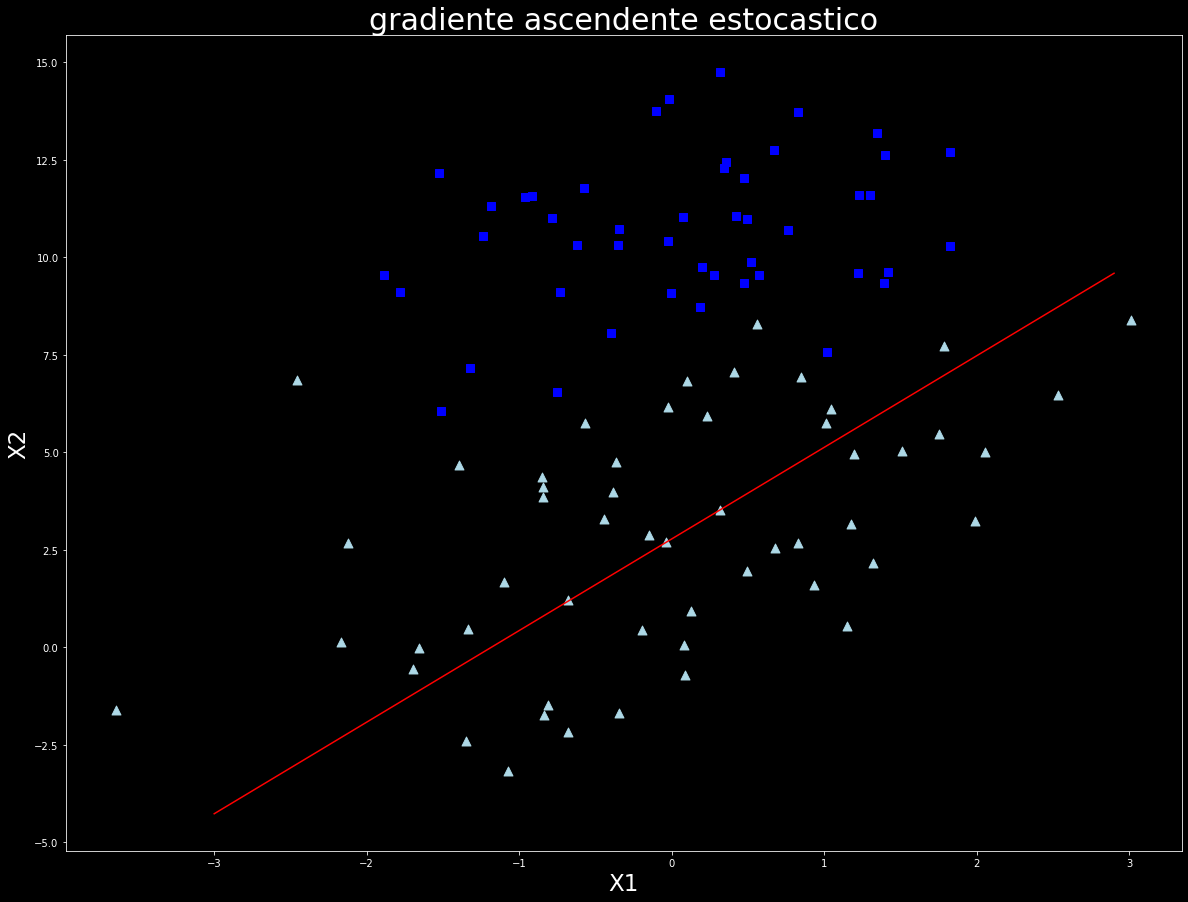

In [ ]:
pesos = gradiente_ascendente_estocastico(np.array(matriz_datos), matriz_etiquetas)
pesos = np.mat(pesos).transpose()
print(f'Pesos: \n{pesos}')
graficar_mejor_aproximacion(pesos, 'gradiente ascendente estocastico')

In [ ]:
def gradiente_ascendente_estocastico_1(matriz_datos, etiquetas_clases, iteraciones=150):
  m, n = np.shape(matriz_datos)
  pesos = np.ones(n)  

  for j in range(iteraciones):        
    indice_datos = list(range(m))

    for i in range(m):
      alfa = 4 / (1.0 + j + i) + 0.01              
      indice_random = int(np.random.uniform(0, len(indice_datos)))       
      h = sigmoide(sum(matriz_datos[indice_random] * pesos))
      error = etiquetas_clases[indice_random] - h
      pesos = pesos + alfa * error * matriz_datos[indice_random]
      del(indice_datos[indice_random])

  return pesos

Pesos: 
[[14.8045935 ]
 [ 1.00082831]
 [-2.21206838]]


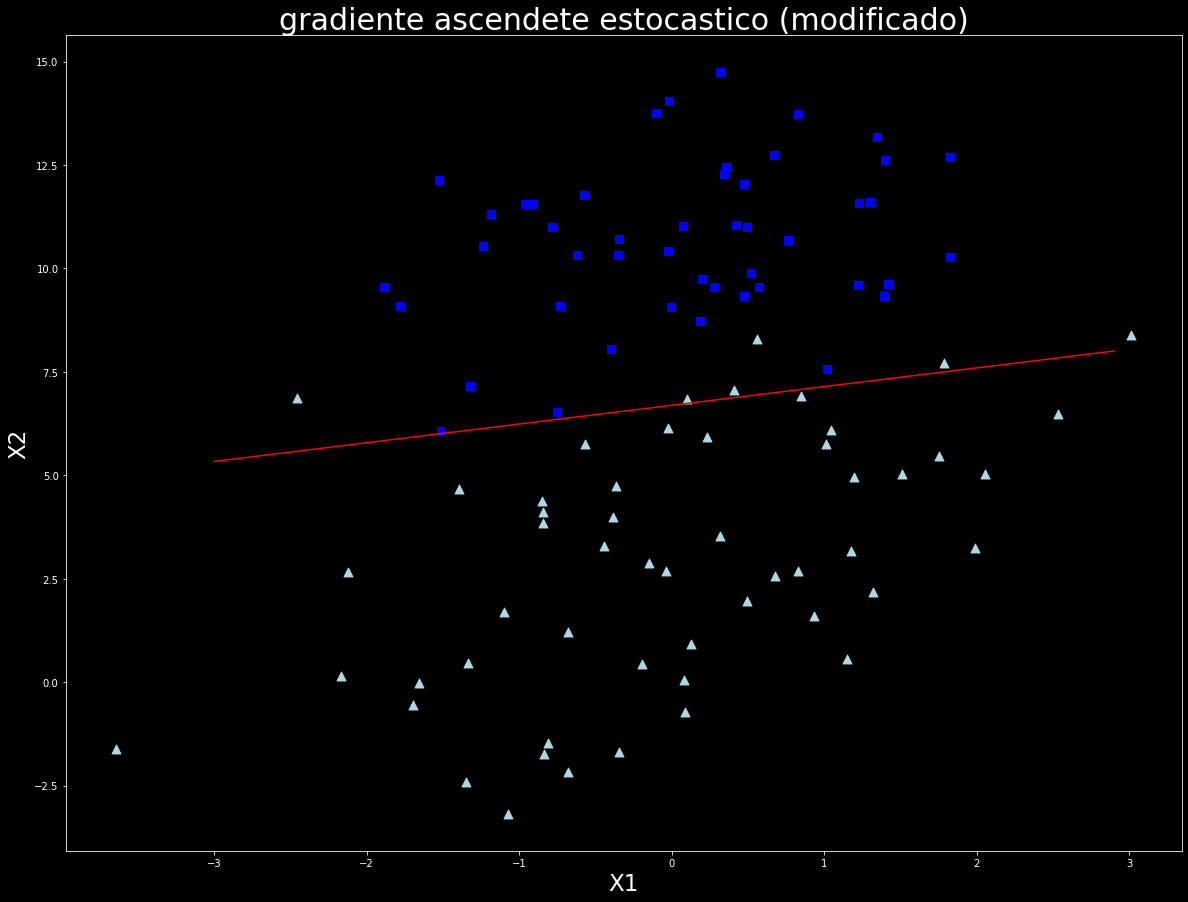

In [ ]:
pesos = gradiente_ascendente_estocastico_1(np.array(matriz_datos), matriz_etiquetas)
pesos = np.mat(pesos).transpose()
print(f'Pesos: \n{pesos}')
graficar_mejor_aproximacion(pesos, 'gradiente ascendete estocastico (modificado)')

## Grouping unlabeled items using k-means clustering

**Enfoque general de la agrupación de k-means**
1. Recoger: Cualquier método.
2. Preparar: Los valores numéricos son necesarios para el cálculo de la distancia, y los valores nominales se pueden convertir en valores binarios para los cálculos de la distancia. para el cálculo de la distancia.
3. Analizar: Cualquier método.
4. Entrenar: No se aplica al aprendizaje no supervisado.
5. Probar: Aplicar el algoritmo de clustering e inspeccionar los resultados. Pueden utilizarse medidas de error cuantitativo cuantitativos, como la suma del error al cuadrado (que se introducirá más adelante).
6. Utilizar: Todo lo que se desee. A menudo, los centros de los clusters pueden ser tratados como datos representativos de todo el cluster para tomar decisiones.

### Ejercicio 1

La primera función, ```cargar_dataset()```, carga un archivo de texto que contiene líneas de flotantes delimitadas por tabulaciones en una lista. Cada una de estas listas se añade a una lista llamada dataMat, que se devuelve. El valor de retorno es una lista que contiene muchas otras listas. Este formato permite permite empaquetar fácilmente los valores en una matriz.

La siguiente función, ```distribucion_euclidiana()```, calcula la distancia euclidiana entre dos vectores. Esta es nuestra función de distancia inicial, que puedes sustituir por otras métricas de distancia.

Finalmente, la última función ```centroide_random()```, que crea un conjunto de k centroides aleatorios para un conjunto de datos dado. Los centroides aleatorios deben estar dentro de los límites del conjunto de datos.

In [ ]:
def cargar_dataset(archivo):
  matriz_datos = []         
  dataset = open(archivo)

  for line in dataset.readlines():
    linea_actual = line.strip().split('\t')
    linea_flotante = list(map(float, linea_actual))
    matriz_datos.append(linea_flotante)

  return matriz_datos

    
def distribucion_euclidiana(vector_a, vector_b):
  return np.sqrt(np.sum(np.power(vector_a - vector_b, 2)))


def centroide_random(dataset, k):
  forma_dataaset = np.shape(dataset)[1]
  centroides = np.mat(np.zeros((k, forma_dataaset)))

  for j in range(forma_dataaset):                    
    j_minimo = min(dataset[:, j])
    rango_j = float(max(dataset[:, j]) - j_minimo)
    centroides[:, j] = j_minimo + rango_j * np.random.rand(k, 1)

  return centroides

In [ ]:
# Probamos nuestras funciones
matriz_datos = np.mat(cargar_dataset('/content/drive/MyDrive/Colab Notebooks/CIC/1 semestre/Matemáticas para las ciencias de la computación/test_set_kmeans.txt'))
print(f'Matriz de datos: \n{matriz_datos[:10]}')

dist_euclidiana = distribucion_euclidiana(matriz_datos[0], matriz_datos[1])
print(f'{dist_euclidiana}')

centroide_rand = centroide_random(matriz_datos, 2)
print(f'{centroide_rand}')

Matriz de datos: 
[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]
 [-5.379713 -3.362104]
 [ 0.972564  2.924086]
 [-3.567919  1.531611]
 [ 0.450614 -3.302219]
 [-3.487105 -1.724432]
 [ 2.668759  1.594842]
 [-3.156485  3.191137]]
5.184632816681332
[[-3.27905575  4.89826426]
 [ 3.83155088 -0.32808969]]


La función ```k_eans()``` acepta cuatro parámetros de entrada. El conjunto de datos y el número de conglomerados que hay que generar son los únicos parámetros necesarios. Una función para usar como métrica de distancia es opcional, y una función para crear los centroides iniciales también es opcional. La función comienza por encontrar el número de elementos en el conjunto de datos y luego crea una matriz para almacenar las asignaciones de clústeres. La matriz de asignación de llamada ```ensayo_cluster```, tiene dos columnas; una columna es para el índice del cluster y la segunda columna es para almacenar el error. Este error es la distancia desde el centroide del cluster al punto actual. Utilizaremos este error más adelante para medir la calidad de nuestros clusters.

Se itera hasta que ninguno de los puntos de datos cambie su cluster. Se crea una bandera llamado ```cambio_cluster```, y si es True se continúa iterando. La iteración es manejada por un bucle while. A continuación se hace un bucle sobre todos los puntos de datos para encontrar el centroide más cercano. Esto se hace Esto se hace recorriendo todos los centroides y midiendo la distancia a cada uno. La distancia se mide con cualquier función que se pase a ```distancia_means```. La función por defecto es ```distribucion_euclidiana()```. Si alguno de estos clusters cambia, se actualiza la bandera ```cambio_cluster```.

In [ ]:
def k_means(dataset, k, distancia_means=distribucion_euclidiana, crear_centroide=centroide_random):
  m = np.shape(dataset)[0]
  ensayo_cluster = np.mat(np.zeros((m, 2)))
  centroides = crear_centroide(dataset, k)
  cambio_cluster = True

  while cambio_cluster:
    cambio_cluster = False

    for i in range(m):
      distancia_minima = np.inf
      indice_minimo = -1

      for j in range(k):                               
        distJI = distancia_means(centroides[j, :], dataset[i, :]) 

        if distJI < distancia_minima:                         
          distancia_minima = distJI
          indice_minimo = j

      if ensayo_cluster[i, 0] != indice_minimo: 
        cambio_cluster = True

      ensayo_cluster[i, :] = indice_minimo, distancia_minima ** 2

    # print(f'Centroides: \n{centroides}')

    for centroide in range(k):                                           
      puntos_en_cluster = dataset[np.nonzero(ensayo_cluster[:, 0].A==centroide)[0]]
      centroides[centroide, :] = np.mean(puntos_en_cluster, axis=0)
                    
  return centroides, ensayo_cluster

In [ ]:
# Probando la función 
mis_centroides, ensayo_cluster = k_means(matriz_datos, 4)

In [ ]:
# Ver mis centroides finales
mis_centroides

matrix([[-3.38237045, -2.9473363 ],
        [-2.46154315,  2.78737555],
        [ 2.80293085, -2.7315146 ],
        [ 2.6265299 ,  3.10868015]])

In [ ]:
'''
  Creamos una estructura dataframe para guardar nuestros datos obtenidos en 
  formato de tabla.
'''
dataframe = pd.DataFrame()
dataframe['x'] = [float(x) for x in np.array(matriz_datos[:, 0])]
dataframe['y'] = [float(y) for y in np.array(matriz_datos[:, 1])]
dataframe['label'] = [int(label) for label in np.array(ensayo_cluster[:, 0] + 1)]
dataframe.head()

,x,y,label
0,1.658985,4.285136,4
1,-3.453687,3.424321,2
2,4.838138,-1.151539,3
3,-5.379713,-3.362104,1
4,0.972564,2.924086,4


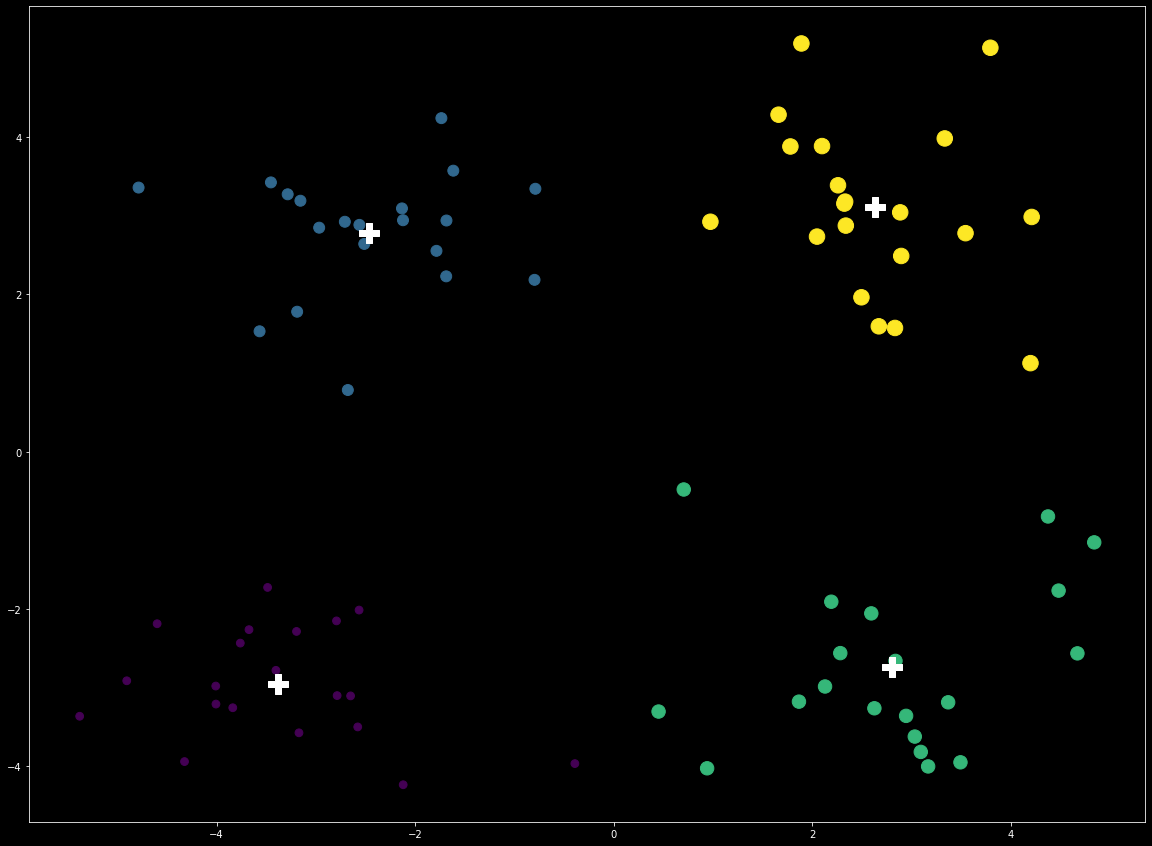

In [ ]:
# Ploteo de nuestros puntos del dataset y nuestros centroides finales
figura = plt.figure(figsize=(20,15))

plt.scatter(dataframe['x'], dataframe['y'], 
            dataframe['label'] * 60, dataframe['label'] * 60)

plt.scatter(np.array(mis_centroides[:, 0]) , np.array(mis_centroides[:, 1]),\
            s=400, color = 'white', marker='P')
plt.show()

### Ejercicio 2

La función comienza creando una matriz para almacenar la asignación de clústeres y el error al cuadrado de cada punto del conjunto de datos. A continuación, se calcula un centroide para todo el conjunto de datos y se crea una lista para guardar todos los centroides. Ahora que tiene un centroide, puede repasar todos los puntos del conjunto de datos y calcular el error entre ese punto y el centroide. Más tarde, necesitarás el error.

A continuación, entra en el bucle while, que divide los clusters hasta que tengas el número deseado de clusters. Puedes medir el número de clusters que tienes midiendo el número de elementos en la lista de clusters. Va a iterar sobre todos los clusters y encontrar el mejor cluster para dividir. Para hacer esto, necesitas comparar el SSE después de cada división. Primero se inicializa el SSE más bajo a infinito; luego se comienza a recorrer cada cluster en la lista de clusters de ```lista_centroides```. Para cada uno de estos clusters, se crea un conjunto de datos con sólo los puntos de ese cluster. Este conjunto de datos se llama ptsInCurrCluster y se introduce en ```k_means()```. El algoritmo k-means le da dos nuevos centroides así como el error cuadrado para cada uno de esos centroides. Estos errores se suman con el error del resto del conjunto de datos. Si esta división produce el menor SSE, entonces se guarda. Una vez que haya decidido qué cluster dividir, es el momento de aplicar esta división. Aplicar la división es tan fácil como sobrescribir las asignaciones de cluster existentes para el cluster que ha decidido dividir. Cuando aplicó ```k_means()``` con dos clústeres, tenía dos clústeres devueltos etiquetados como 0 y 1. Necesita cambiar estos números de clúster por el número de clúster que está dividiendo y el siguiente clúster a añadir. Esto se hace con dos filtros de matriz. Finalmente, estas nuevas asignaciones de cluster se actualizan y el nuevo centroide se añade a ```lista_centroides```.

Cuando el bucle while termina, la lista de centroides y las asignaciones de cluster son devuelven, de la misma manera que se hace en ```k_means()```.

In [ ]:
def biseccion_kmeans(dataset, k, medida_distancia = distribucion_euclidiana):
  m = np.shape(dataset)[0]
  cluster_evaluacion = np.mat(np.zeros((m, 2)))
  centroide_0 = np.mean(dataset, axis= 0).tolist()[0]
  lista_centroides = [centroide_0]

  for j in range(m):
    cluster_evaluacion[j, 1] = medida_distancia(np.mat(centroide_0), dataset[j, :]) ** 2

    while (len(lista_centroides) < k):
      sse_menor = np.inf

      for i in range(len(lista_centroides)):
        puntos_en_cluster_actual = dataset[np.nonzero(cluster_evaluacion[:, 0].A == i)[0], :]
        matriz_centroides, cluster_evaluacion_dividido = k_means(puntos_en_cluster_actual, 2, medida_distancia, centroide_random)
        sse_dividido = np.sum(cluster_evaluacion_dividido[:, 1])
        sse_no_dividido = np.sum(cluster_evaluacion[np.nonzero(cluster_evaluacion[:, 0].A != i)[0], 1])
        print(f'SSE dividido: {sse_dividido}; SSE no dividido: {sse_no_dividido} ')

        if (sse_dividido + sse_no_dividido) < sse_menor:
          mejor_centroide_a_dividir = i
          mejores_nuevos_centroides = matriz_centroides
          mejor_cluster_evaluacion = cluster_evaluacion_dividido.copy()
          sse_menor = sse_dividido + sse_no_dividido

      mejor_cluster_evaluacion[np.nonzero(mejor_cluster_evaluacion[:, 0].A == 1)[0], 0] = len(lista_centroides)
      mejor_cluster_evaluacion[np.nonzero(mejor_cluster_evaluacion[:, 0].A == 0)[0], 0] = mejor_centroide_a_dividir
      print(f'El mejor centroide a dividir es: {mejor_centroide_a_dividir}')
      print(f'La longitud del mejor cluster evaluacion es: {len(mejor_cluster_evaluacion)}')

      lista_centroides[mejor_centroide_a_dividir] = mejores_nuevos_centroides[0, :]
      lista_centroides.append(mejores_nuevos_centroides[1, :])
      cluster_evaluacion[np.nonzero(cluster_evaluacion[:, 0].A == mejor_centroide_a_dividir)[0], :] = mejor_cluster_evaluacion

    return lista_centroides, cluster_evaluacion

In [ ]:
# Cargamos nuestro dataset
matriz_datos_1 = np.mat(cargar_dataset('/content/drive/MyDrive/Colab Notebooks/CIC/1 semestre/Matemáticas para las ciencias de la computación/test_set_kmeans_1.txt'))

# Probamos la función  biseccion_kmeans
lista_centroides, mis_nuevas_evaluaciones = biseccion_kmeans(matriz_datos_1, 3)

SSE dividido: 453.0334895807502; SSE no dividido: 0.0 
El mejor centroide a dividir es: 0
La longitud del mejor cluster evaluacion es: 60
SSE dividido: 12.753263136887313; SSE no dividido: 423.8762401366249 
SSE dividido: 77.59224931775066; SSE no dividido: 29.15724944412535 
El mejor centroide a dividir es: 1
La longitud del mejor cluster evaluacion es: 40


In [ ]:
# Obtenemos nuestros centroides
centroides = []

for i in range(len(lista_centroides)):
  centroides.append(np.array((lista_centroides[i])).flatten())

mis_nuevos_centroides = np.matrix(centroides)
mis_nuevos_centroides

matrix([[-0.45965615, -2.7782156 ],
        [-2.94737575,  3.3263781 ],
        [ 2.93386365,  3.12782785]])

In [ ]:
'''
  Creamos una estructura dataframe para guardar nuestros datos obtenidos en 
  formato de tabla.
'''
data_frame = pd.DataFrame()
data_frame['x'] = [float(x) for x in np.array(matriz_datos_1[:,0])]
data_frame['y'] = [float(y) for y in np.array(matriz_datos_1[:,1])]
data_frame['label'] = [int(label) for label in np.array(mis_nuevas_evaluaciones[:, 0] + 1)]
data_frame.head()

,x,y,label
0,3.275154,2.957587,3
1,-3.344465,2.603513,2
2,0.355083,-3.376585,1
3,1.852435,3.547351,3
4,-2.078973,2.552013,2


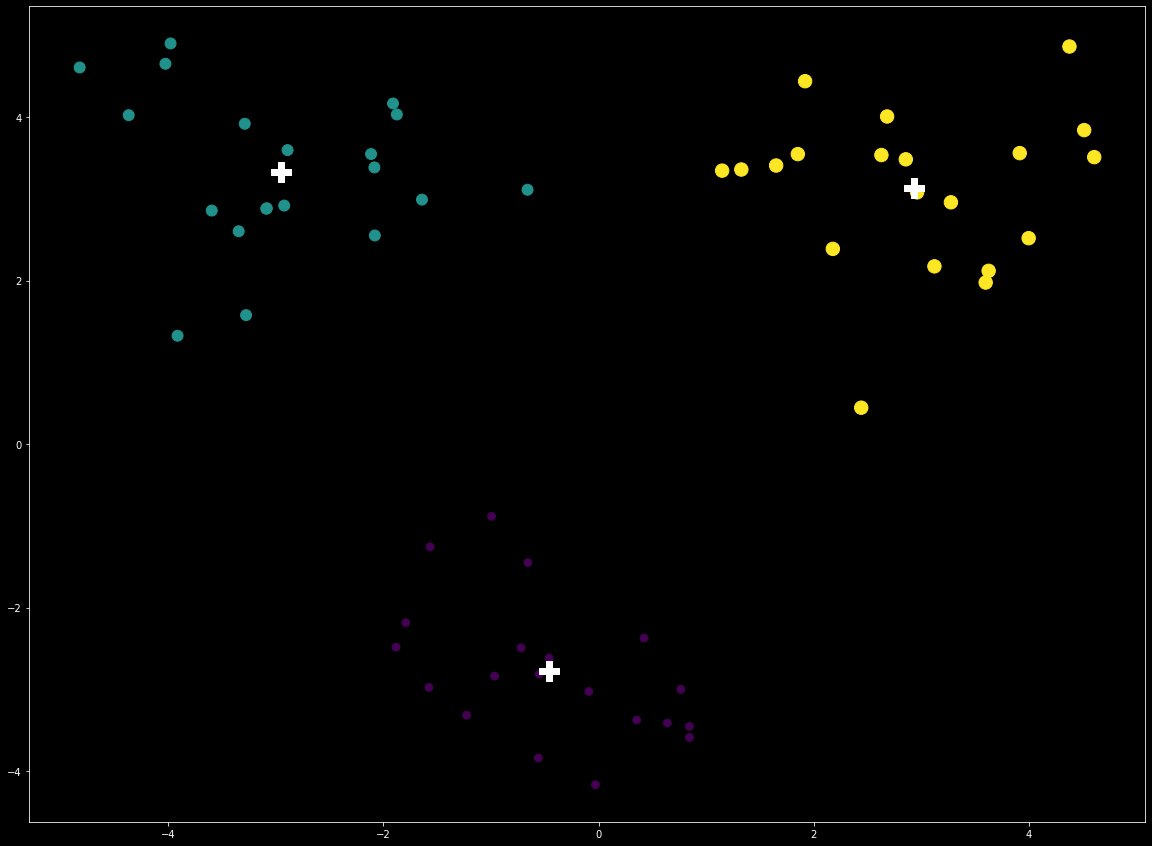

In [ ]:
# Ploteo de nuestros puntos del dataset y nuestros centroides finales
figura = plt.figure(figsize=(20, 15))

plt.scatter(data_frame['x'], data_frame['y'], 
            data_frame['label'] * 60.0, data_frame['label'] * 60.0)

plt.scatter(np.array(mis_nuevos_centroides[:, 0]).flatten(), 
           np.array(mis_nuevos_centroides[:, 1]).flatten(), s=400, marker='P', 
           c='white')

plt.show()